In [6]:
### Change variables here!! ###

textless_fr_dir = "../conll18/fr_textless"
wav2tree_fr_dir = "../conll18/fr_wav2tree"
textless_en_dir = "../conll18/en_textless"
wav2tree_en_dir = "../conll18/en_wav2tree"

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy import integrate

def encode_head(x: int):
    if x < 0:
        return "L" + str(-x)
    else:
        return "R" + str(x)

def extract_pos(r):
    return r.split('/')[2].split('_')[0]

def get_x_and_acc(df):
    x = df['HEAD'].map(encode_head).astype(str) + '\n' + df['total'].astype(str)
    # x = df['DEPREL'] + '\n' + df['total'].astype(str)
    acc = df['correct']/df['total']
    return x, acc

In [8]:
import glob
results_textless_fr = sorted(glob.glob(f"{textless_fr_dir}/*_HEAD"))
results_wav2tree_fr = sorted(glob.glob(f"{wav2tree_fr_dir}/*_HEAD"))
results_textless_en = sorted(glob.glob(f"{wav2tree_en_dir}/*_HEAD"))
results_wav2tree_en = sorted(glob.glob(f"{wav2tree_en_dir}/*_HEAD"))

assert len(results_textless_fr) == len(results_wav2tree_fr)
assert len(results_textless_en) == len(results_wav2tree_en)

In [10]:
# filter out ADJ, ADV, NOUN, VERB

fr_pos = ["ADJ", "ADV", "NOM", "VRB"]
en_pos = ["ADJ", "ADV", "NOUN", "VERB"]

def filter_out_pos(result, poss):
    return list(filter(lambda x: extract_pos(x) in poss, result))

results_textless_fr = sorted(filter_out_pos(results_textless_fr, fr_pos))
results_wav2tree_fr = sorted(filter_out_pos(results_wav2tree_fr, fr_pos))
results_textless_en = sorted(filter_out_pos(results_textless_en, en_pos))
results_wav2tree_en = sorted(filter_out_pos(results_wav2tree_en, en_pos))

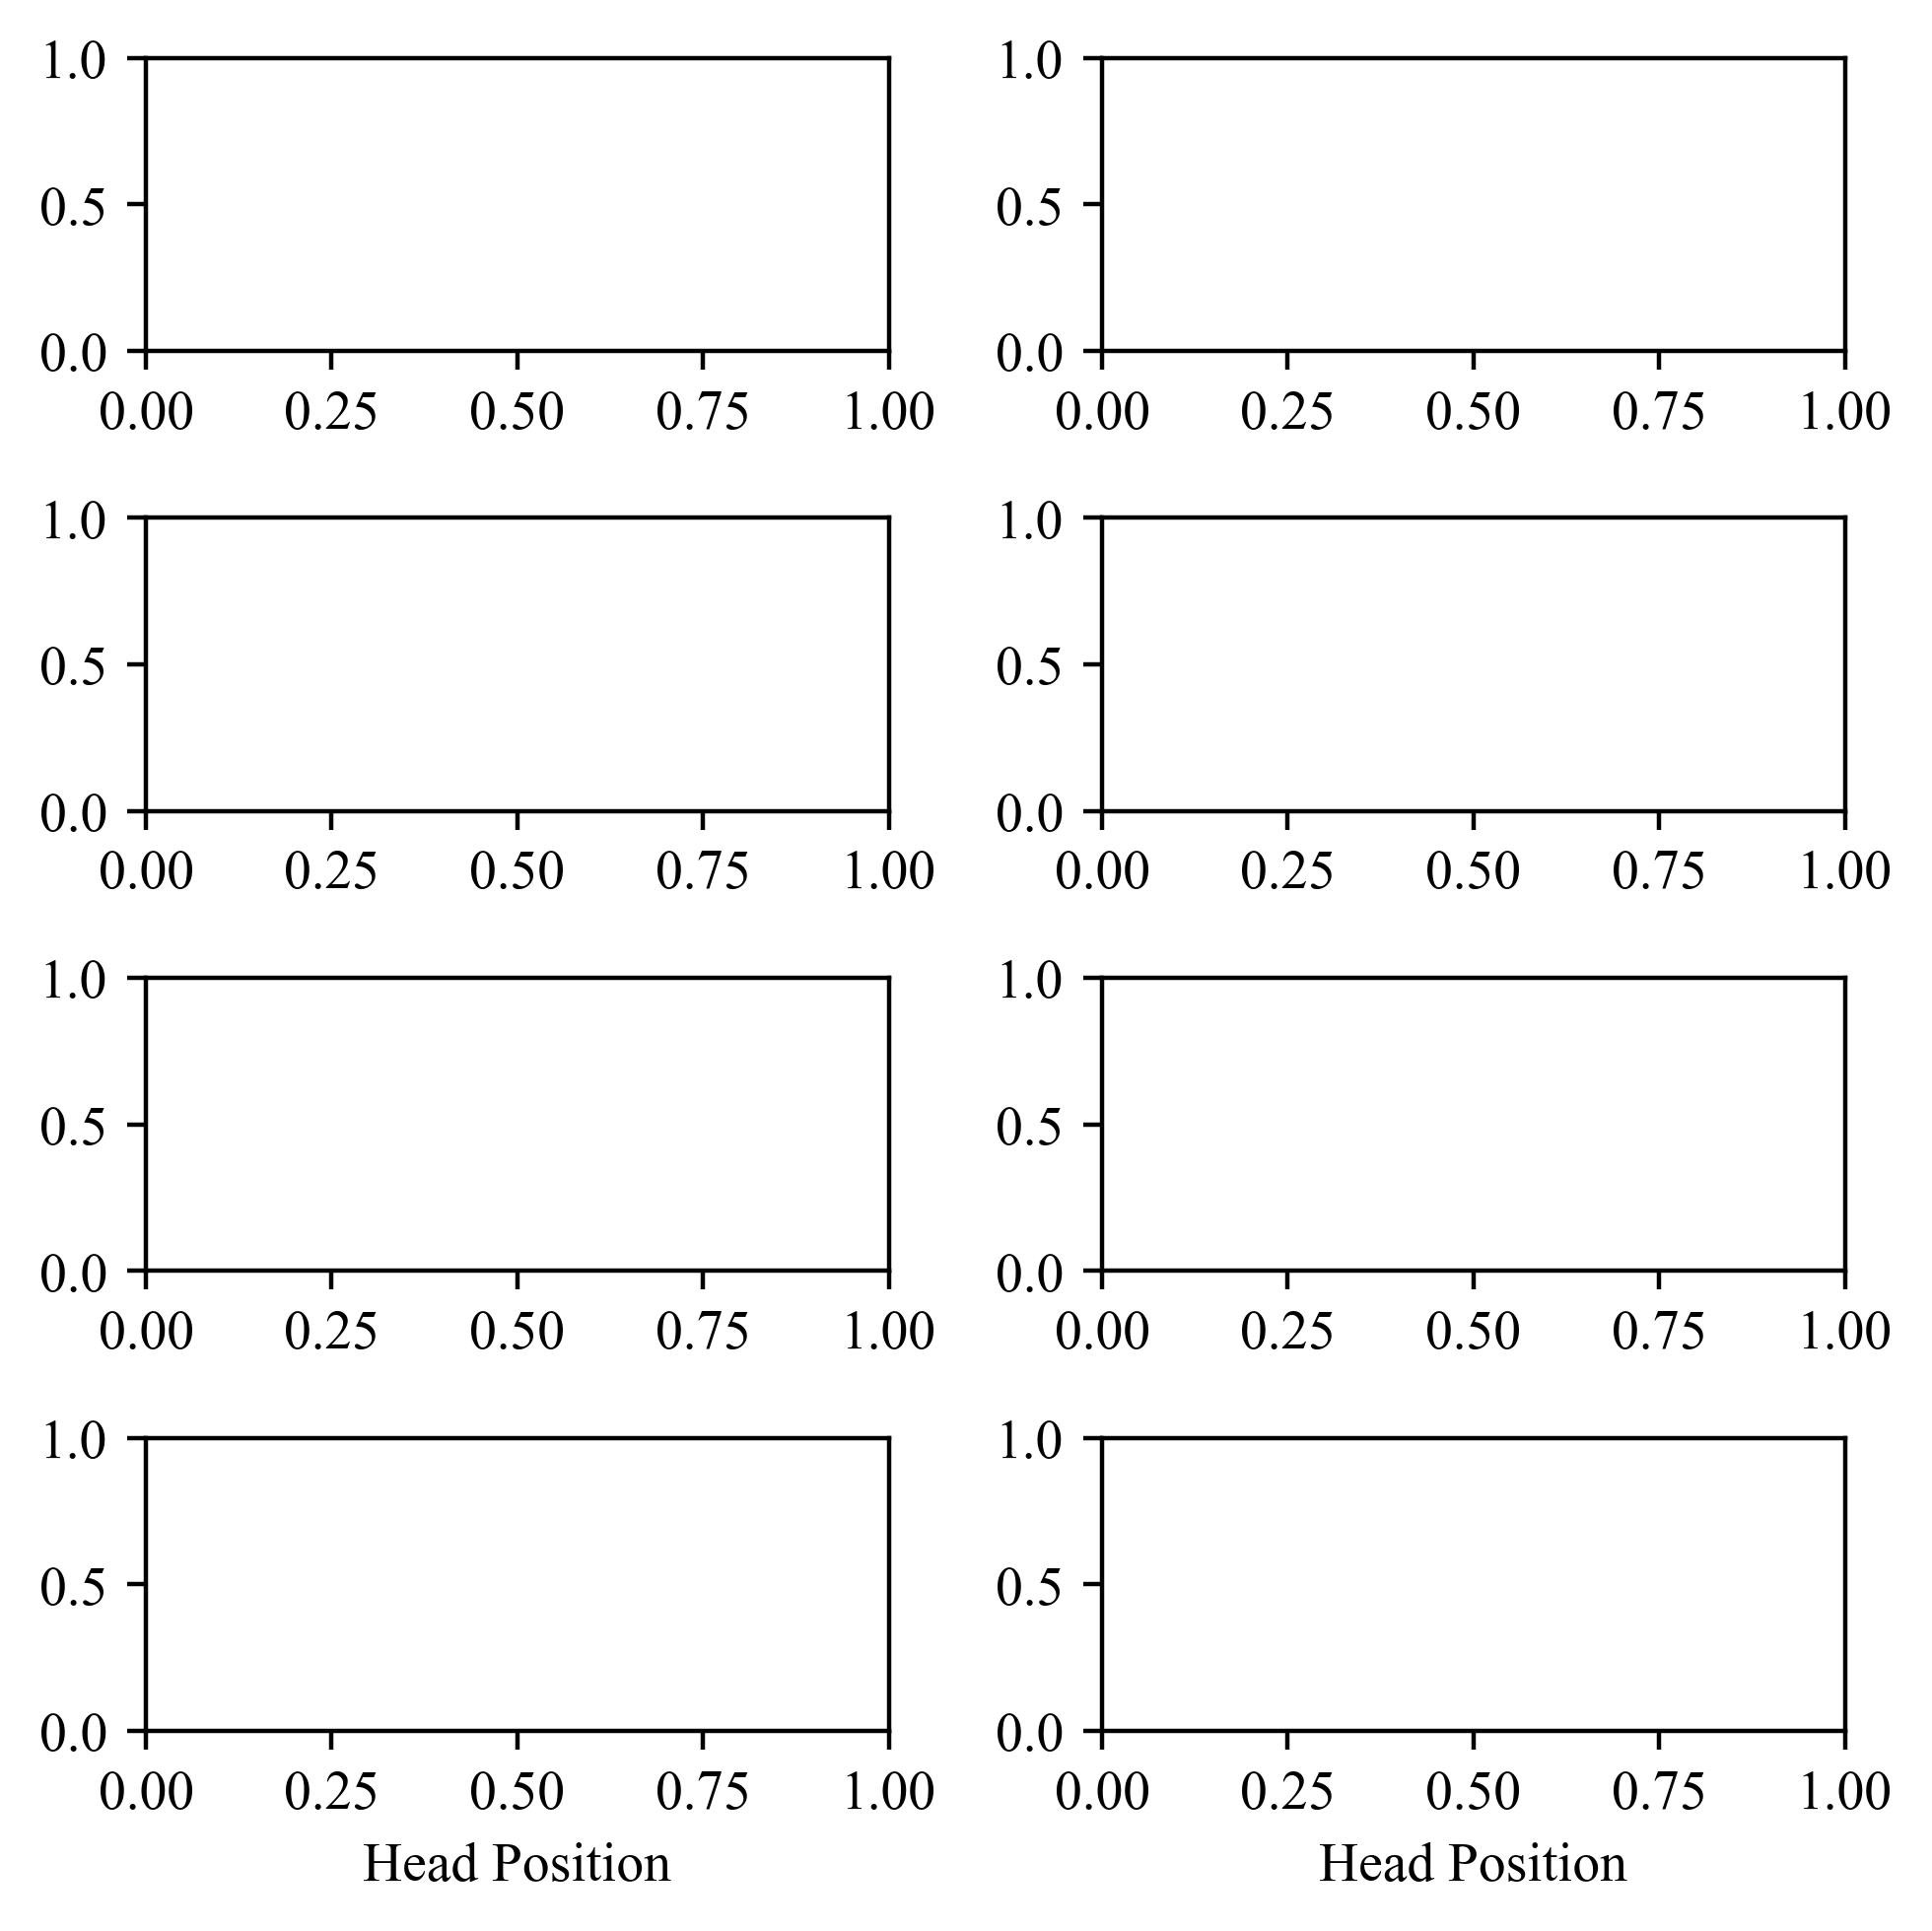

In [11]:
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'
topN = 12
n = 4

def get_x_and_acc_wo_freq(df):
    x = df['HEAD'].map(encode_head).astype(str)
    acc = df['correct']/df['total']
    return x, acc


fig, axes = plt.subplots(n, 2, tight_layout=True, figsize=(5, 5), dpi=400)

for i, (tf, wf, te, we) in enumerate(zip(results_textless_fr, results_wav2tree_fr, results_textless_en, results_wav2tree_en)):
    assert extract_pos(tf) == extract_pos(wf)
    POS = extract_pos(tf)

    df_textless = pd.read_csv(tf, sep='\t')
    df_textless = df_textless.query('HEAD==[-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]')
    df_textless = df_textless.sort_values('HEAD', ascending=True)
    x_textless, acc_textless = get_x_and_acc_wo_freq(df_textless)

    df_wav2tree = pd.read_csv(wf, sep='\t')
    df_wav2tree = df_wav2tree.query('HEAD==[-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]')
    df_wav2tree = df_wav2tree.sort_values('HEAD', ascending=True)
    x_wav2tree, acc_wav2tree = get_x_and_acc_wo_freq(df_wav2tree)

    if POS == "NOM":
        POS = "NOUN"
    if POS == "VRB":
        POS = "VERB"

    ax2 = axes[i, 0].twinx()
    axes[i, 0].bar(x_textless[:topN], np.log(df_wav2tree['total']), color='gray')   
    axes[i, 0].tick_params(labelsize=8) 
    axes[i, 0].set_ylabel("Frequency (log)", fontsize=8)
    ax2.set_title(POS)
    ax2.set_ylim(0, 1)
    ax2.set_yticklabels([])
    ax2.plot(x_textless[:topN], acc_textless[:topN], label='Textless')
    ax2.plot(x_wav2tree[:topN], acc_wav2tree[:topN],  label='Wav2tree')
    ax2.tick_params(labelsize=8)
    ax2.grid()
    if i == 0:
        ax2.legend(fontsize=7, loc='lower center')

    assert extract_pos(te) == extract_pos(we)
    POS = extract_pos(te)

    df_textless = pd.read_csv(te, sep='\t')
    df_textless = df_textless.query('HEAD==[-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]').sort_values('HEAD')
    df_textless = df_textless.sort_values('HEAD', ascending=True)
    x_textless, acc_textless = get_x_and_acc_wo_freq(df_textless)

    df_wav2tree = pd.read_csv(we, sep='\t')
    
    df_wav2tree = df_wav2tree.query('HEAD==[-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6]').sort_values('HEAD')
    df_wav2tree = df_wav2tree.sort_values('HEAD', ascending=True)
    x_wav2tree, acc_wav2tree = get_x_and_acc_wo_freq(df_wav2tree)


    ax2 = axes[i, 1].twinx()
    axes[i, 1].bar(x_textless[:topN], np.log(df_wav2tree['total']), color='gray')
    axes[i, 1].tick_params(labelsize=8)
    axes[i, 1].set_yticklabels([])
    ax2.set_title(POS)
    ax2.set_ylim(0, 1)
    ax2.set_ylabel("Accuracy", fontsize=8)
    ax2.plot(x_textless[:topN], acc_textless[:topN], label='Textless')
    ax2.plot(x_wav2tree[:topN], acc_wav2tree[:topN],  label='Wav2tree')
    ax2.tick_params(labelsize=8)
    ax2.grid()


axes[3, 0].set_xlabel("Head Position")
axes[3, 1].set_xlabel("Head Position")

# plt.savefig("pos_freq.png")